# Use to test our function by calling them from the main function

In [1]:
from src.deepLearning import *
from src.visualisation_src.DL_visualisation import *
from src.NetworkGraphs import *
from NetworkGraphs import *
from src.visualisation import *

In [2]:
networkGraph = NetworkGraphs('../datasets/Railway.csv', type="RAILWAY")

Excluded 0 stations
twopi
sfdp


In [3]:
model, emb = node2vec_embedding(networkGraph,p=1,q=1)
similarity_matrix(networkGraph, model)

Computing transition probabilities:   0%|          | 0/2719 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


array([[1.        , 0.91081977, 0.86152649, ..., 0.29096496, 0.27961501,
        0.25750402],
       [0.91081977, 1.        , 0.95383376, ..., 0.34708524, 0.34455299,
        0.32448739],
       [0.86152649, 0.95383376, 0.99999994, ..., 0.29570296, 0.29155698,
        0.27195156],
       ...,
       [0.29096496, 0.34708524, 0.29570296, ..., 1.        , 0.9949429 ,
        0.9914372 ],
       [0.27961501, 0.34455299, 0.29155698, ..., 0.9949429 , 1.        ,
        0.9977535 ],
       [0.25750402, 0.32448739, 0.27195156, ..., 0.9914372 , 0.9977535 ,
        1.        ]])

In [4]:
plot_node2vec(networkGraph, p=1, q=1, fullPath=True, visualisation='TSNE')

Computing transition probabilities:   0%|          | 0/2719 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


'None/node2vec.html'

In [11]:
model, emb = node2vec_embedding(networkGraph,p=1,q=1)

Computing transition probabilities:   0%|          | 0/2719 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]


In [ ]:
umap_visualisation(networkGraph, emb, 'nodeumap.html')
TSNE_visualisation(networkGraph, emb, 'nodetsne.html')
PCA_visualisation(networkGraph, emb, 'nodepca.html')

In [1]:
import geopandas as gpd
import plotly.express as px
from preprocessing import *
from metrics import *
from NetworkGraphs import *
from machineLearning import *

In [2]:
# customGraphs = NetworkGraphs('../datasets/Railway.csv', type="RAILWAY")
# print('done')
# metric = compute_node_metrics(customGraphs)

Excluded 0 stations
done


twopi
sfdp


Computing transition probabilities:   0%|          | 0/380 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 13/13 [00:00<00:00, 17.59it/s]


Node2Vec generated 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Optimal number of clusters:  5  with silhouette score:  0.31961796


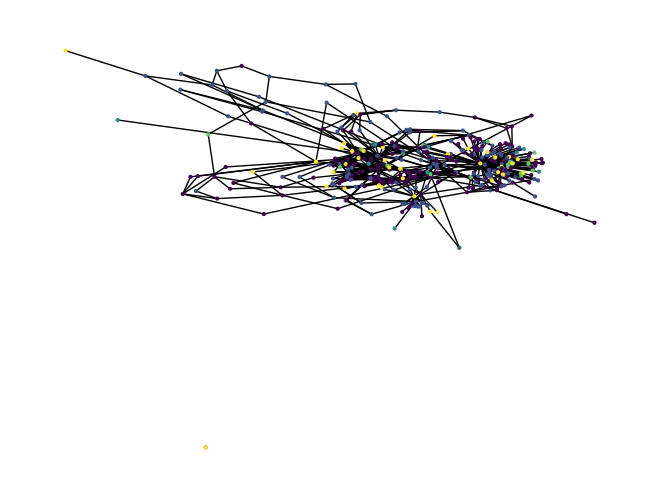

In [2]:
networkGraph = NetworkGraphs('../datasets/Dune_Eth_transaction.csv', type="CRYPTO")


In [3]:
hmlt = plot_metrics_on_map(customGraphs, metric, 'HMLT')

In [ ]:
hmlt.show()

In [10]:
hmlt.data=(hmlt.data[2], hmlt.data[1], hmlt.data[0])

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
display(world.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
#isolate world by max lat and long and min lat and long
max_lat = customGraphs.max_lat
min_lat = customGraphs.min_lat
max_long = customGraphs.max_long
min_long = customGraphs.min_long
mid_lat = customGraphs.mid_lat
mid_long = customGraphs.mid_long

print(max_lat, min_lat, max_long, min_long, mid_lat, mid_long)


fig = px.choropleth(world,hover_name="name", locations="iso_a3")
fig.update_geos(
    lataxis_range=[min_lat,max_lat], lonaxis_range=[min_long, max_long],
    center=dict(lat=mid_lat, lon=mid_long),
)
fig.show()

53.48948 17.79638 134.90248 75.47524 35.64293 105.18886


NameError: name 'world' is not defined

In [40]:
import plotly.graph_objects as go

# isolate world by max lat and long and min lat and long
max_lat = customGraphs.max_lat
min_lat = customGraphs.min_lat
max_long = customGraphs.max_long
min_long = customGraphs.min_long
mid_lat = customGraphs.mid_lat
mid_long = customGraphs.mid_long

go_fig=go.Choropleth(
    locations=world['iso_a3'],
    text=world['name'],
    colorscale='Viridis',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Title',
)

layout = go.Layout(
    title_text='World Map',
    geo=dict(
        scope='world',
        projection=go.layout.geo.Projection(type='equirectangular'),
        showcountries=True,
        lataxis_range=[min_lat, max_lat],
        lonaxis_range=[min_long, max_long],
        center=dict(lat=mid_lat, lon=mid_long),

    ),
)

"""
showland=True,
        landcolor='rgb(243, 243, 243)',
        subunitcolor='rgb(217, 217, 217)',
        countrycolor='rgb(217, 217, 217)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
        showcountries=True,
        resolution=50,
"""

fig = go.Figure(data=go_fig, layout=layout)

fig.show()


In [7]:
G = customGraphs.Graph

pos = customGraphs.pos['map']

node_trace = go.Scattergeo(lon=[], lat=[], text=[], mode='markers', hoverinfo='text',
                        marker=dict(showscale=True, color=['red'], size=3,
                                    colorbar=dict(thickness=10, title='Node Connections', xanchor='left',
                                                  titleside='right'), line=dict(width=2, color='#FF0000')))
i=0
for node in G.nodes():
    x, y = pos[node]
    node_trace['lon'] += tuple([x])
    node_trace['lat'] += tuple([y])

layout = go.Layout(
    titlefont=dict(size=16, color='White'),
    showlegend=False,
    hovermode='closest',
    annotations=[
        dict(
            text="Alpha Team - 2023",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002,
            font=dict(color='black')
        )
    ],
    geo=dict(
        scope='world',
        lataxis_range=[min_lat, max_lat],
        lonaxis_range=[min_long, max_long],
        center=dict(lat=mid_lat, lon=mid_long),

    ),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white',
    height=1000
)
# plot the figure
fig = go.Figure(data=[node_trace],
                layout=layout)
# export to html
filename = f'metrics_map_directed.html'
fig.write_html(filename)

In [6]:
max_lat = customGraphs.max_lat
min_lat = customGraphs.min_lat
max_long = customGraphs.max_long
min_long = customGraphs.min_long
mid_lat = customGraphs.mid_lat
mid_long = customGraphs.mid_long